In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pwd = os.getcwd()

stock_data = pd.read_csv(pwd + '/merged_data.csv')

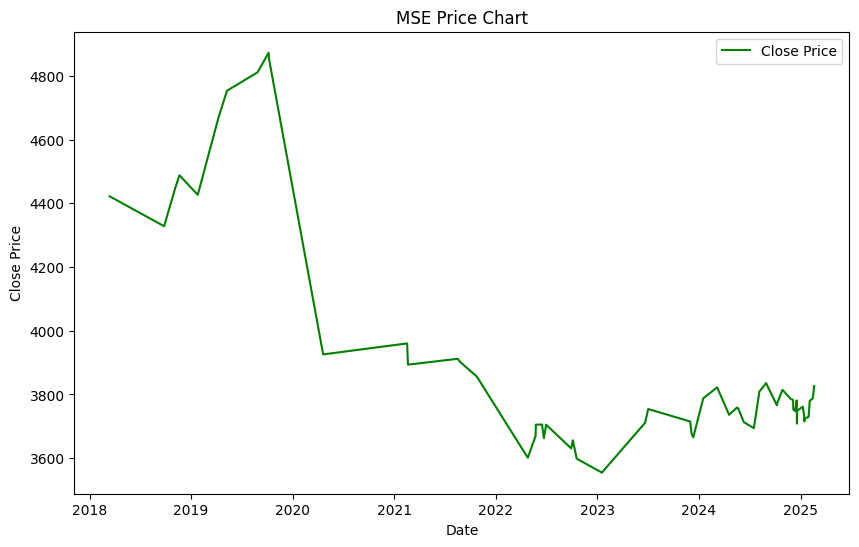

In [3]:
# Convert the 'date' column to datetime
stock_data['date'] = pd.to_datetime(stock_data['date'])

# Filter data for the last 7 years
last_7_years = stock_data[stock_data['date'] >= stock_data['date'].max() - pd.DateOffset(years=7)]

# Visualize the data
plt.figure(figsize=(10, 6))
plt.plot(last_7_years['date'], last_7_years['Close'], label='Close Price', color='green')
plt.title('MSE Price Chart')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                1350 non-null   datetime64[ns]
 1   Open                1350 non-null   float64       
 2   Close               1350 non-null   float64       
 3   Change              1350 non-null   float64       
 4   majority_sentiment  1350 non-null   int64         
 5   average_sentiment   1350 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 63.4 KB
None

Summary Statistics:
                      date         Open        Close       Change  \
count                 1350  1350.000000  1350.000000  1350.000000   
mean   2012-12-11 06:45:20  3574.993585  3575.058491     0.001557   
min    2007-10-03 00:00:00  2643.380000  2643.379000    -4.626435   
25%    2010-05-17 06:00:00  3197.877500  3196.941500    -0.2

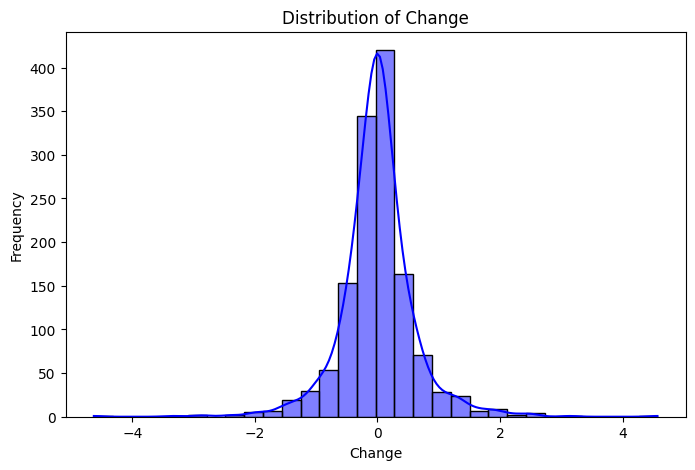

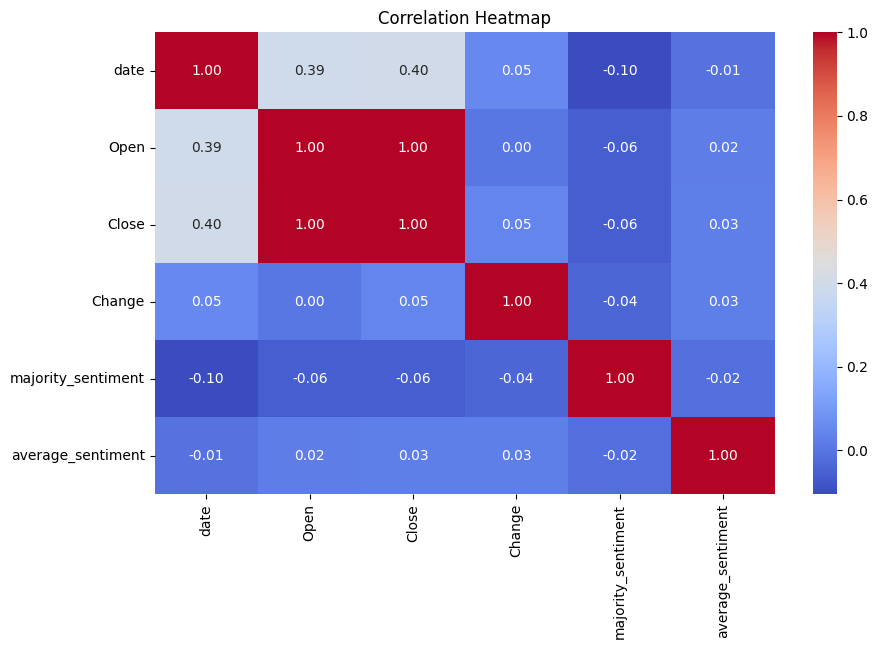

C:\Users\ivane\AppData\Local\Temp\ipykernel_15428\858826854.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='majority_sentiment', data=stock_data, palette='viridis')


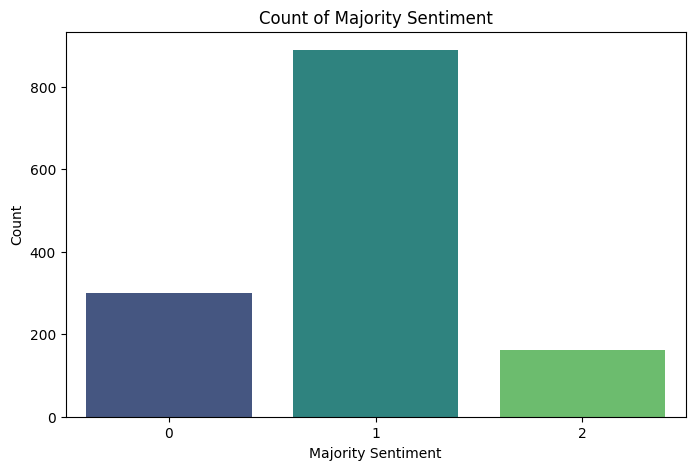

In [4]:
# Display basic information about the dataset
print("Dataset Info:")
print(stock_data.info())

# Display summary statistics
print("\nSummary Statistics:")
print(stock_data.describe())

# Check for missing values
print("\nMissing Values:")
print(stock_data.isnull().sum())

# Plot the distribution of 'Change'
plt.figure(figsize=(8, 5))
sns.histplot(stock_data['Change'], kde=True, bins=30, color='blue')
plt.title('Distribution of Change')
plt.xlabel('Change')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(stock_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Countplot for 'majority_sentiment'
plt.figure(figsize=(8, 5))
sns.countplot(x='majority_sentiment', data=stock_data, palette='viridis')
plt.title('Count of Majority Sentiment')
plt.xlabel('Majority Sentiment')
plt.ylabel('Count')
plt.show()

<Figure size 1000x600 with 0 Axes>

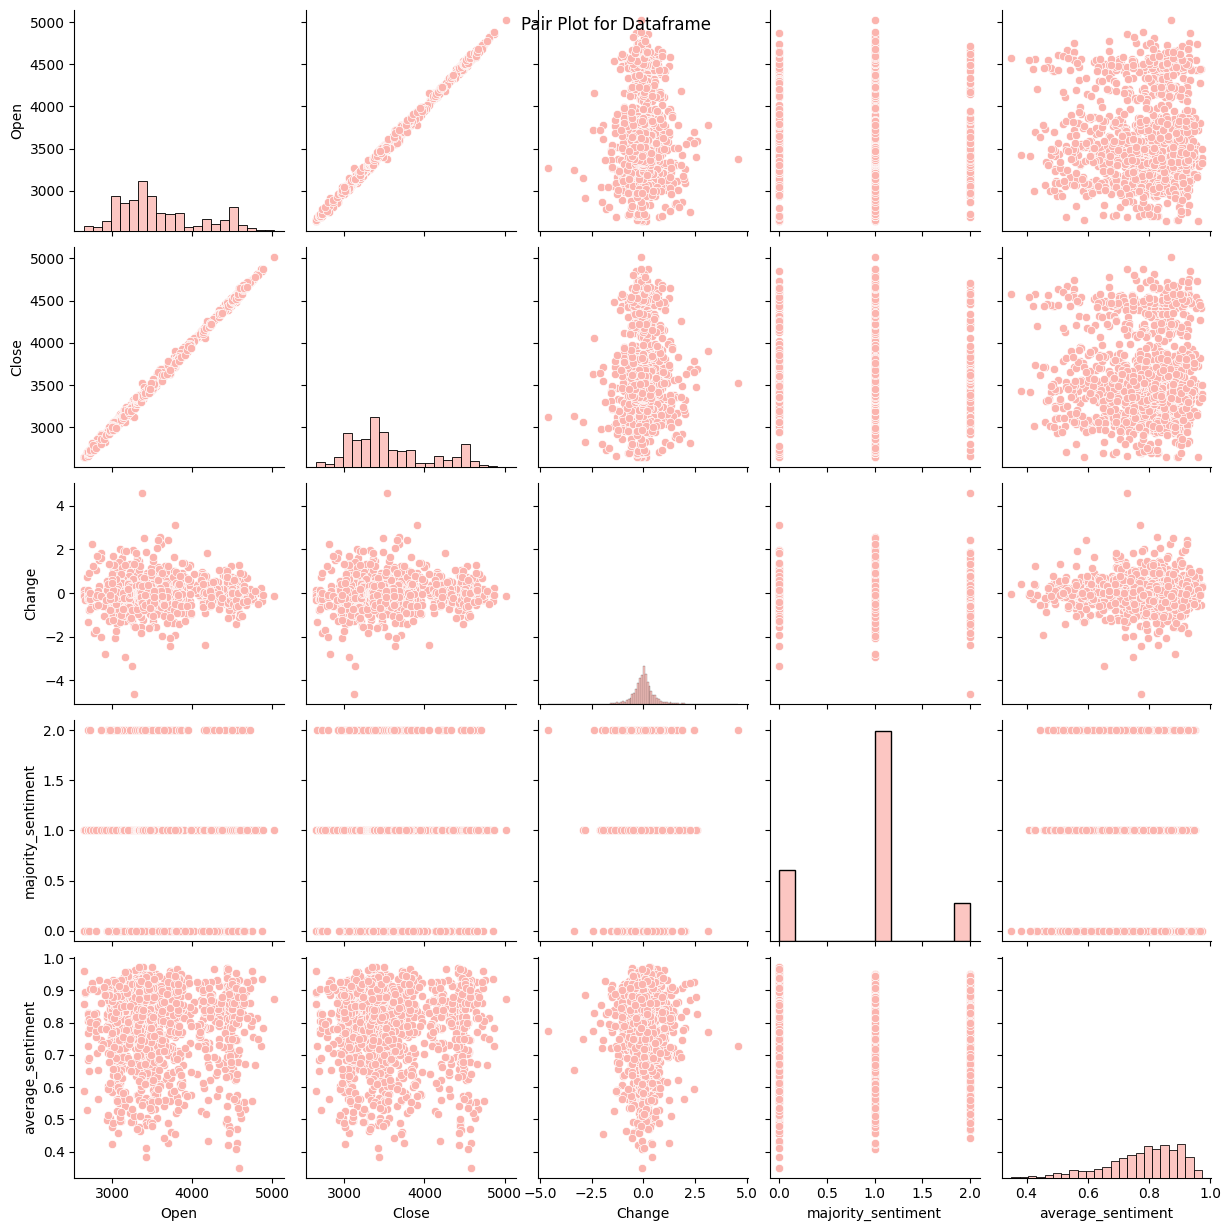

In [5]:
# pair plot
sns.set_palette('Pastel1')

plt.figure(figsize=(10,6))

sns.pairplot(stock_data)

plt.suptitle('Pair Plot for Dataframe')
plt.show()

In [6]:
# importing news data
news_data = pd.read_csv(pwd + '/df.csv')
news_data.head()

,headline,date,time,description,sentiment,sentiment_score
0,Friedrich Merz’s cabinet: Who will lead German...,"April 11, 2025",4:40 am CET,Here are the politicians most likely to occupy...,neutral,0.940863
1,Italy approves draft law outlawing violence ag...,"March 8, 2025",4:38 pm CET,NaN,positive,0.477088
2,Germany’s economy is driving off a cliff. The ...,"February 19, 2025",4:16 am CET,NaN,negative,0.711748
3,Trump’s return is an ‘electroshock’ for Europe...,"February 14, 2025",10:46 am CET,NaN,neutral,0.518905
4,"Stocks tumble, dollar surges on Trump trade war","February 3, 2025",8:51 am CET,NaN,negative,0.793771


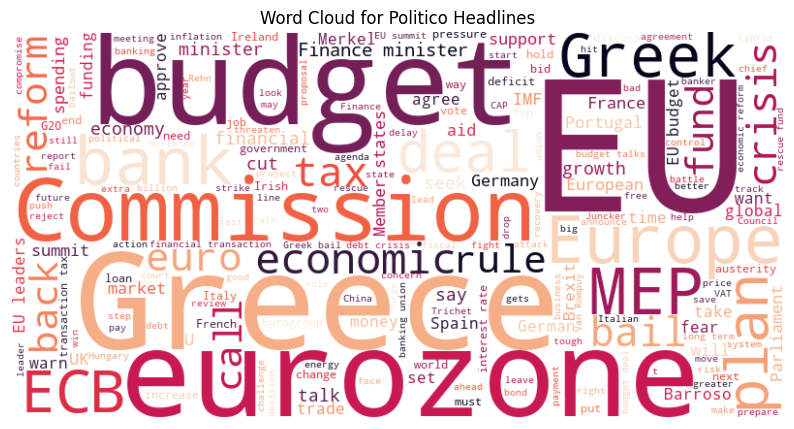

In [10]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

# Generate a word cloud for the 'description' column
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='rocket', stopwords=STOPWORDS.union({'malta', 'new', 's'})).generate(' '.join(news_data['headline'].dropna()))

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Politico Headlines')
plt.show()